In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.optimize import curve_fit

In [54]:
def import_data(meas_num, path, filename):
    '''import data'''
    filepath = path+'/'+filename+'_'+str(meas_num)+'.dat'
    print(filepath)
    data = np.loadtxt(filepath)
 
    return data
 
def create_mesh(X,Y,D1,D2=[]):
    # extract sweep values for X
    Xv=np.unique(X)
  
    #Make sure all lines are complete
    no=len(X)%len(Xv)
    X=X[0:(len(X)-no)]
    Y=Y[0:(len(Y)-no)]
    D1=D1[0:(len(D1)-no)]
    if len(D2)!=0:
        D2=D2[0:(len(D2)-no)]
   
    # extract sweep values for Y
    Yv=np.unique(Y)
           
    #Create grids.
    Xm,Ym = np.meshgrid(Xv,Yv)
    D1m=D1.reshape(Xm.shape)
    if len(D2)!=0:
        D2m=D2.reshape(Xm.shape)
   
    # flip if the scan direction is positive to negative
    if Yv[0]==Y[0]:
        Yv=Yv
    elif len(D2)!=0:
        D1m=np.flipud(D1m)
        D2m=np.flipud(D2m)
    else:
        D1m=np.flipud(D1m)
   
    if len(D2)!=0:
        return Xm, Ym, D1m, D2m
    else:
        return Xm, Ym, D1m
    
def window(d, window_length, window_offset):
    middle= int(len(d)/2)

    start_ind = middle - window_length + window_offset
    end_ind = middle + window_length + window_offset
    return start_ind, end_ind

In [184]:
def calc_Is2(bias, signal, startIndx, endIndx, thresh):
    fit = np.polyfit(bias[startIndx:endIndx],signal[startIndx:endIndx],1)
    #print("fit succeeded: ", fit)
    signal = signal - np.poly1d(fit)(bias)
    #print("signal calculated: ", signal)
    switch_ind = 0
    for i, val in enumerate(signal[:]):
         if val > thresh:
            switch_ind = i
            return bias[switch_ind], signal
    else:
        print("threshhold not reached")
        #plt.plot(bias, signal)
        #plt.show()
        return 15., signal
    #return signal

In [129]:
def extract_Is(x,y,d, switch_thresh, fit_window, window_offset=0, show_plot=False):
    switch_currs = []
    yvalues = []
    
    start, end = fit_window
    
    for i, linecut in enumerate(d):
        yvalues.append(y[i,0])
        try:
            Is, signal = calc_Is2(x[0], linecut, start, end, switch_thresh)
        except Exception as e:
            print(e)
            print(i)
            #print("x-axis: ", x[0])
            #print("linecut: ", linecut)
            #print("start: ",start)
            #print("end: ",end)
            #print("thresholds: " ,trap_thresh, switch_thresh)
        if i == 69 and show_plot:
            plt.axvline(x=Is, color='r', ls='--')
            plt.plot(x[0], signal)
            #plt.plot(x[0], linecut)
            plt.show()
        switch_currs.append(Is)
    return yvalues, np.array(switch_currs)

# Plots of Data

D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_7.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_8.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_9.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_10.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_11.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_12.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_13.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_14.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_15.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_16.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_17.dat
101
D:/eleerssen/Data/2017-12-18_InAs_squids/InAsepiAl_SQUID7_Ibias_Bdac_28.dat
151
D:/eleerssen/Data/2017-12-18_InAs_squids/In

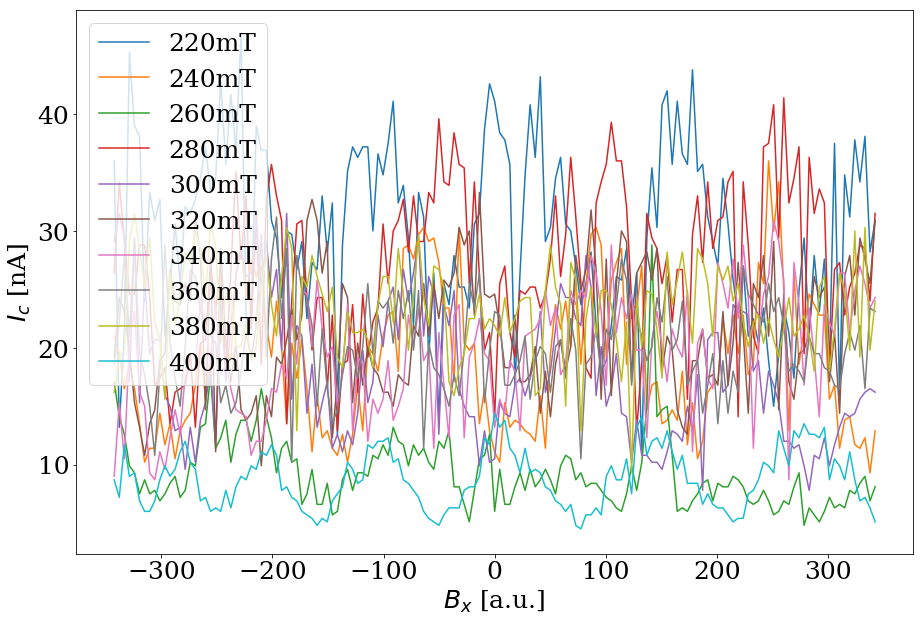

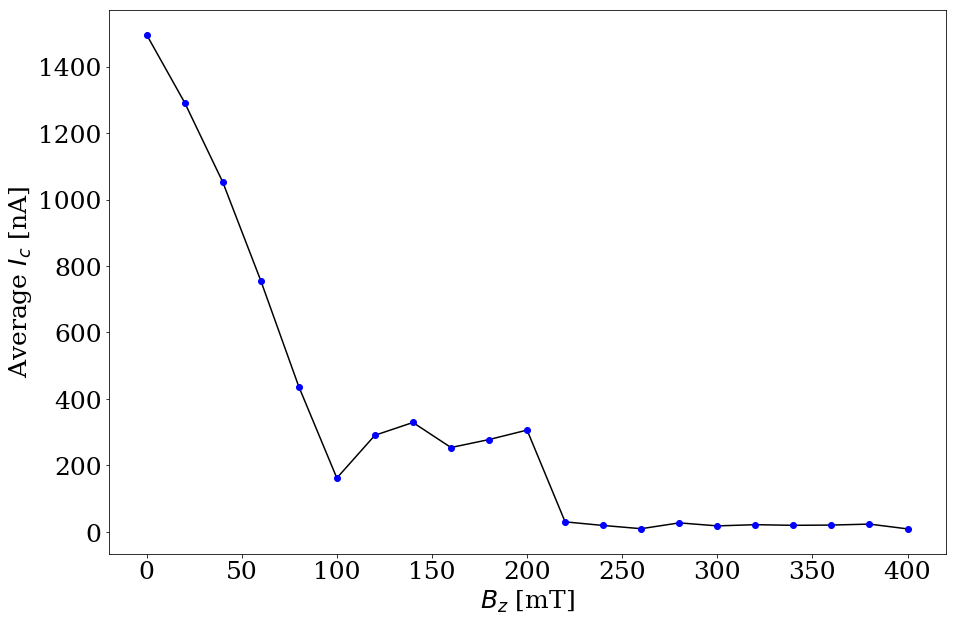

In [216]:
path = "D:/eleerssen/Data/2017-12-18_InAs_squids"
filename = "InAsepiAl_SQUID7_Ibias_Bdac"
labels = {7:"0mT",8:"20mT",9:"40mT",10:"60mT",11:"80mT",12:"100mT",13:"120mT",14:"140mT",15:"160mT",16:"180mT",17:"200mT",
          23:"220mT", 24:"240mT", 25:"260mT",26:"280mT", 27:"300mT", 28:"220mT", 29:"240mT", 30:"260mT",
          31:"280mT", 32:"300mT", 33:"320mT",34:"340mT", 35:"360mT", 36:"380mT", 37:"400mT"}
data_col = 4
switch_thresh = 1e-5
fit_window = (0,10)
#window_length = 30
#i=29
colors = iter(range(10))

plt.rc('font', family='serif', size=25)
plt.figure(figsize=(15,10))
averages = []
fields = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220,240,260,280,300,320,340,360,380,400]
'''
for index, i in enumerate(range(7,18,1)):

    data = import_data(i, path, filename)

    Xm, Ym, D1m = create_mesh(data[:,0],data[:,1],data[:,data_col])

    yvalues, switch_currs = extract_Is(Xm,Ym,D1m, switch_thresh, fit_window, show_plot=False)
    averages.append(np.average(switch_currs))
    #switch_currs = scipy.signal.savgol_filter(switch_currs,7,1)
    print(len(switch_currs))
    #avg = np.average(switch_currs)
    #switch_currs = switch_currs-avg
    #color = 'C' + str(next(colors))
    #plt.plot(yvalues, switch_currs, color=color, label=labels[i])
'''
for index, i in enumerate(range(28,38,1)):

    data = import_data(i, path, filename)

    Xm, Ym, D1m = create_mesh(data[:,0],data[:,1],data[:,data_col])

    yvalues, switch_currs = extract_Is(Xm,Ym,D1m, switch_thresh, fit_window, show_plot=False)
    averages.append(np.average(switch_currs))
    #switch_currs = scipy.signal.savgol_filter(switch_currs,7,1)
    print(len(switch_currs))
    #avg = np.average(switch_currs)
    #switch_currs = switch_currs-avg
    color = 'C' + str(next(colors))
    plt.plot(yvalues, switch_currs, color=color, label=labels[i])
#plt.plot(yvalues, trap_currs, 'C' + str(1))
plt.legend()
plt.xlabel("$B_x$ [a.u.]")
plt.ylabel("$I_c$ [nA]")
plt.show()

if False:
    plt.figure(figsize=(15,10))
    plt.plot(fields[:len(averages)], averages, 'k', fields[:len(averages)], averages, 'bo')
    plt.xlabel('$B_z$ [mT]')
    plt.ylabel('Average $I_c$ [nA]')
    plt.show()

In [97]:
1e-5

1e-05

In [98]:
5e-4

0.0005

In [99]:
10e-4

0.001

In [100]:
0.1e-5

1e-06

In [101]:
5e-5

5e-05

In [176]:
a = {4:'hert',5:'bert'}
a[5]

'bert'